<a href="https://colab.research.google.com/github/chrisciou/libsvm/blob/master/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import files
uploaded = files.upload()

Saving Case_Study.csv to Case_Study (3).csv


In [0]:
import pandas as pd
import numpy as np
import datetime
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [50]:
!ls

'Case_Study (1).csv'  'Case_Study (3).csv'   sample_data
'Case_Study (2).csv'   Case_Study.csv


In [0]:
df = pd.read_csv('Case_Study (3).csv')

In [54]:
df.head()

,Month,Electricity_Demand,Price
0,Jan-09,5.5,7.9
1,Feb-09,5.1,7.3
2,Mar-09,6.5,9.3
3,Apr-09,6.1,8.7
4,May-09,6.1,8.8


    Month  Electricity_Demand  Price
0  Jan-09                 5.5    7.9
1  Feb-09                 5.1    7.3
2  Mar-09                 6.5    9.3
3  Apr-09                 6.1    8.7
4  May-09                 6.1    8.8


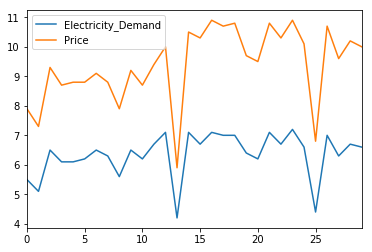

In [55]:
print(df.head())
df.plot()
pyplot.show()

In [0]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.tsa.stattools import acf

In [69]:
df2 = df.drop(["Month","Price"], axis = 1)
print(df2)

    Electricity_Demand
0                  5.5
1                  5.1
2                  6.5
3                  6.1
4                  6.1
5                  6.2
6                  6.5
7                  6.3
8                  5.6
9                  6.5
10                 6.2
11                 6.7
12                 7.1
13                 4.2
14                 7.1
15                 6.7
16                 7.1
17                 7.0
18                 7.0
19                 6.4
20                 6.2
21                 7.1
22                 6.7
23                 7.2
24                 6.6
25                 4.4
26                 7.0
27                 6.3
28                 6.7
29                 6.6


In [74]:
# fit model
model = ARIMA(df2, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.Electricity_Demand   No. Observations:                   29
Model:                   ARIMA(5, 1, 0)   Log Likelihood                 -32.533
Method:                         css-mle   S.D. of innovations              0.718
Date:                  Mon, 29 Jul 2019   AIC                             79.065
Time:                          14:42:36   BIC                             88.636
Sample:                               1   HQIC                            82.063
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0189      0.031      0.604      0.552      -0.042       0.080
ar.L1.D.Electricity_Demand    -1.0297      0.181     -5.692      0.

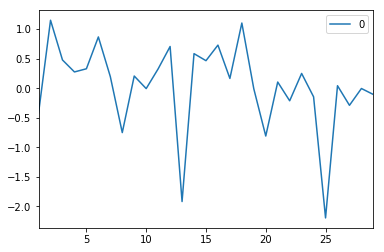

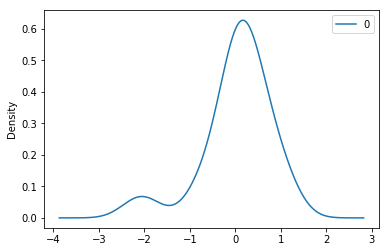

               0
count  29.000000
mean    0.037618
std     0.746152
min    -2.195380
25%    -0.146518
50%     0.164499
75%     0.465081
max     1.149213


In [75]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

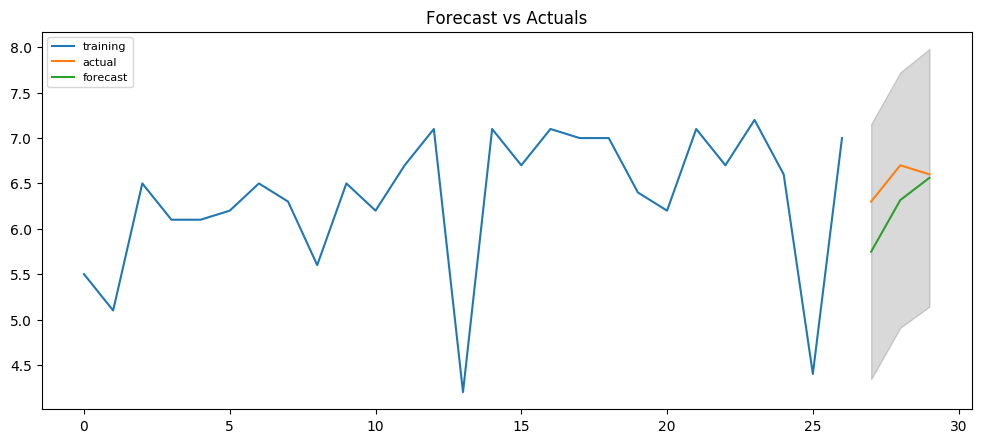

In [90]:
train = df2[:27]
test = df2[27:]

# Forecast
fc, se, conf = model_fit.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()